In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Reading Data
file_path = "/kaggle/input/motorcycle-dataset/BIKE DETAILS.csv"
bike_data = pd.read_csv(file_path)

In [3]:
#Data Head
print(bike_data.head())

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  


In [4]:
#Data Tail
print(bike_data.tail())

                    name  selling_price  year seller_type      owner  \
1056           Activa 3g          17000  2010  Individual  1st owner   
1057    Honda CB twister          16000  2012  Individual  1st owner   
1058  Bajaj Discover 125          15000  2013  Individual  2nd owner   
1059      Honda CB Shine          12000  2009  Individual  1st owner   
1060    Bajaj Pulsar 150          10000  2008  Individual  1st owner   

      km_driven  ex_showroom_price  
1056     500000            52000.0  
1057      33000            51000.0  
1058      35000            57000.0  
1059      53000            58000.0  
1060      92233            75000.0  


In [5]:
#Data Description
print(bike_data.describe())

       selling_price         year      km_driven  ex_showroom_price
count    1061.000000  1061.000000    1061.000000       6.260000e+02
mean    59638.151744  2013.867107   34359.833176       8.795871e+04
std     56304.291973     4.301191   51623.152702       7.749659e+04
min      5000.000000  1988.000000     350.000000       3.049000e+04
25%     28000.000000  2011.000000   13500.000000       5.485200e+04
50%     45000.000000  2015.000000   25000.000000       7.275250e+04
75%     70000.000000  2017.000000   43000.000000       8.703150e+04
max    760000.000000  2020.000000  880000.000000       1.278000e+06


Text(0, 0.5, 'Frequency')

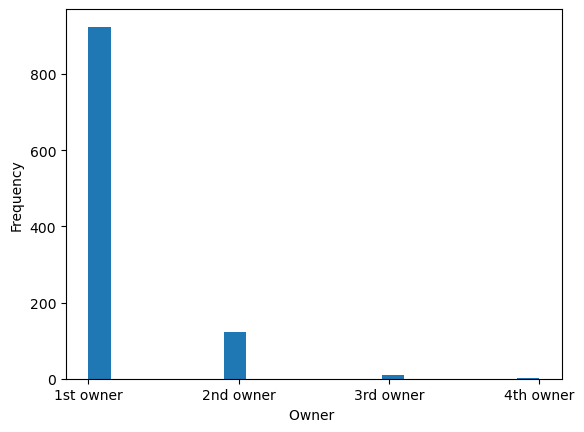

In [6]:
#Histogram for Owner (Order of the bike's owner if there exist previous owner for the vehicle) to see their frequencies

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(bike_data['owner'],bins = 20)
ax1.set_xlabel('Owner ')
ax1.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

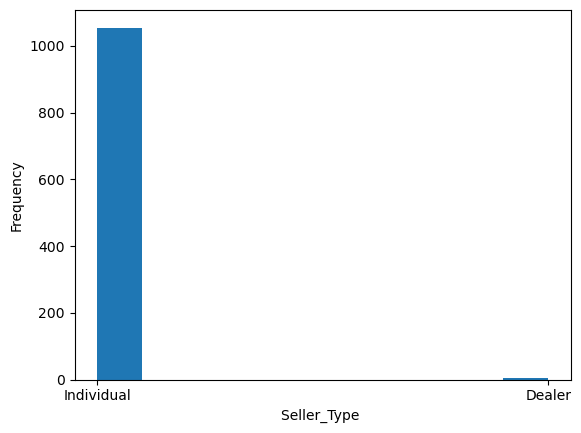

In [7]:
#Histogram for seller_type (Individual-Dealer) to see their frequencies

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(bike_data['seller_type'])
ax2.set_xlabel('Seller_Type ')
ax2.set_ylabel('Frequency')  

array([[<AxesSubplot:title={'center':'selling_price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'km_driven'}>,
        <AxesSubplot:title={'center':'ex_showroom_price'}>]], dtype=object)

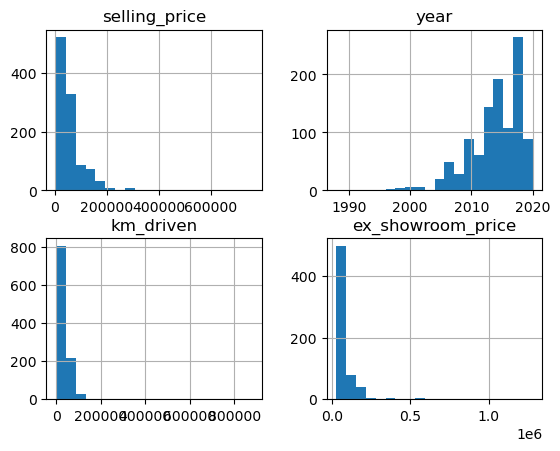

In [8]:
#Histogram for whole data
bike_data.hist(bins=20)

<AxesSubplot:title={'center':'selling_price'}, xlabel='year'>

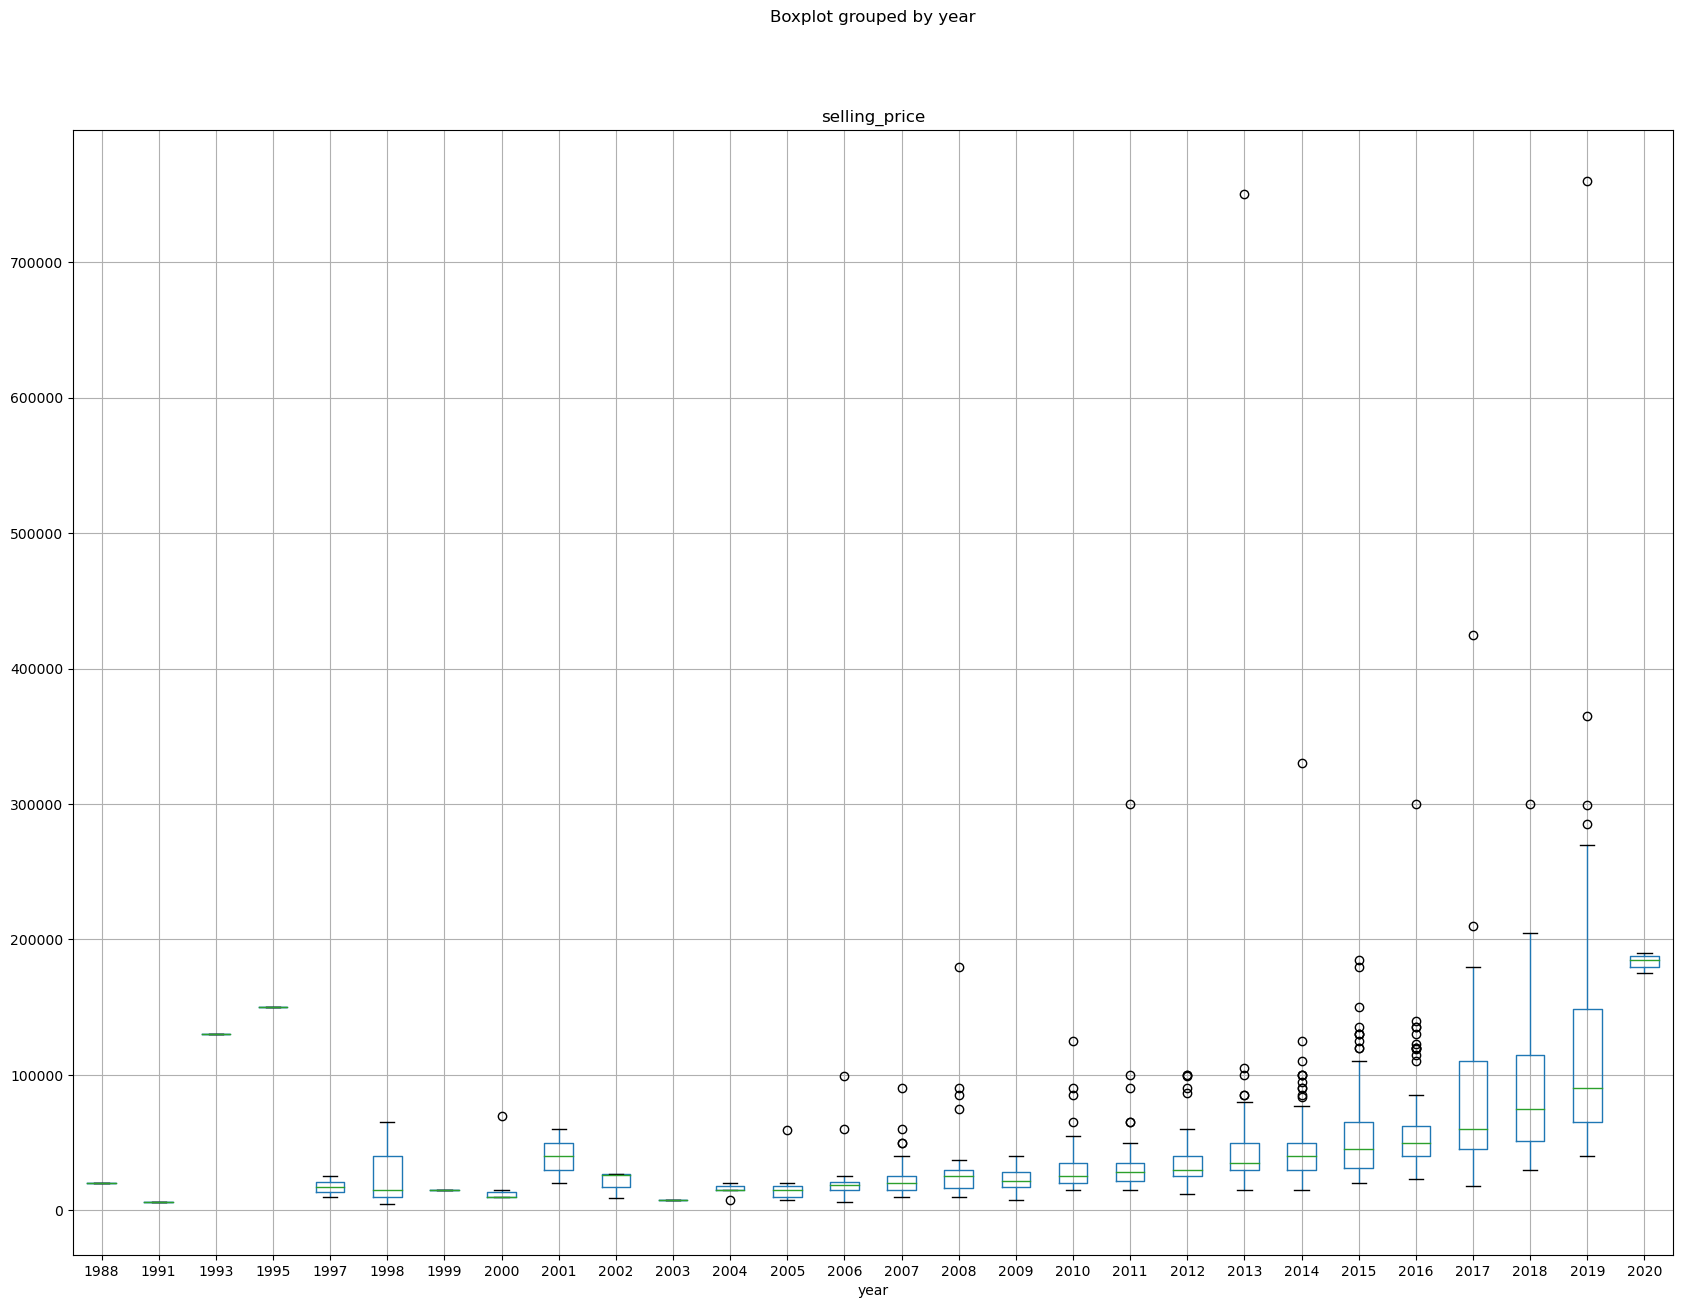

In [9]:
# shows presence of a lot of outliers values
bike_data.boxplot(column='selling_price', by = 'year' , figsize=(20,15))

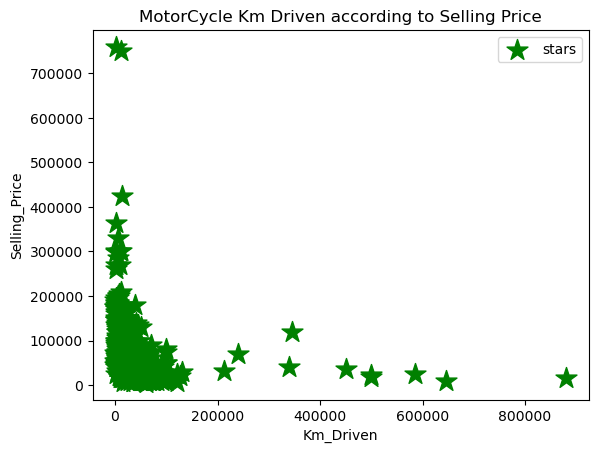

In [10]:
x = bike_data['km_driven']
y = bike_data['selling_price']
plt.scatter(x, y, label= "stars", color= "green", 
            marker= "*", s=250)
  
# x-axis label
plt.xlabel('Km_Driven')
# frequency label
plt.ylabel('Selling_Price')
# plot title
plt.title('MotorCycle Km Driven according to Selling Price')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()

In [11]:
# to get unique values in owner's column to use in the pie chart
print(bike_data['owner'].unique())

['1st owner' '2nd owner' '3rd owner' '4th owner']


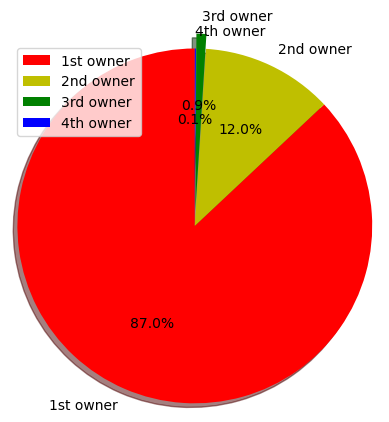

In [12]:
activities = ['1st owner', '2nd owner', '3rd owner', '4th owner']
  
# portion covered by each label
slices = [87, 12, 0.9, 0.1]
  
# color for each label
colors = ['r', 'y', 'g', 'b']
  
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
        radius = 1.2, autopct = '%1.1f%%')
  
# plotting legend
plt.legend()
  
# showing the plot
plt.show()

In [13]:
#Data Cleaning
#ex_showroom_price column got empty values (Non-Null Count = 626)
#We will fill the missing values using fillna with mean of the data.
# filling missing value of ex_showroom_price column
bike_data['ex_showroom_price'].fillna(value = bike_data['ex_showroom_price'].mean(),
                                    inplace = True)

print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  1061 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB
None


In [14]:
# I created a new column called check_price to see how many values that we filled from the missing data in ex_showroom_price column are valid 
# According to what I understand I can see that ex_showroom_price should be greater than selling_price (as this one is the price of the vehicle after it was used by it's owner with respect to other properties)
# So if ex_showroom_price is greater than selling_price the value of the new column will be 1 (true) and 0 (false) if otherwise. 
bike_data['check_price'] = np.where((bike_data['selling_price'] < bike_data['ex_showroom_price']) , 1, 0)

In [15]:
#Encoding Labels
#Seller_Type , Owner columns are textual data so we transformed them to integer
le = LabelEncoder()
bike_data['seller_type'] = le.fit_transform(bike_data["seller_type"])
bike_data['owner'] = le.fit_transform(bike_data["owner"])

#I am a little hesitant about the name of the owner of the motorcycle , I really don't know if we need it or not.

In [16]:
# splitting data into features and target
x = bike_data.loc[:,['year','seller_type','owner','km_driven','ex_showroom_price']]
y = bike_data.loc[:,['selling_price']]

In [17]:
#splitting data into train and test data

X_train, X_test,y_train, y_test = train_test_split(x,y ,test_size=0.2,random_state=104)

In [18]:
# Linear Regression Model
reg = LinearRegression()
model = reg.fit(X_train,y_train)

In [19]:

#y^ (predicted values)
y_pred = model.predict(X_test)

In [20]:
#Model Evaluation
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

print("MAE = " , MAE)
print("\nMSE = " , MSE)
print("\nRMSE = " , RMSE)


MAE =  19504.503852967042

MSE =  912033491.2319852

RMSE =  30199.892238747892


In [21]:
test_residual= y_test - y_pred

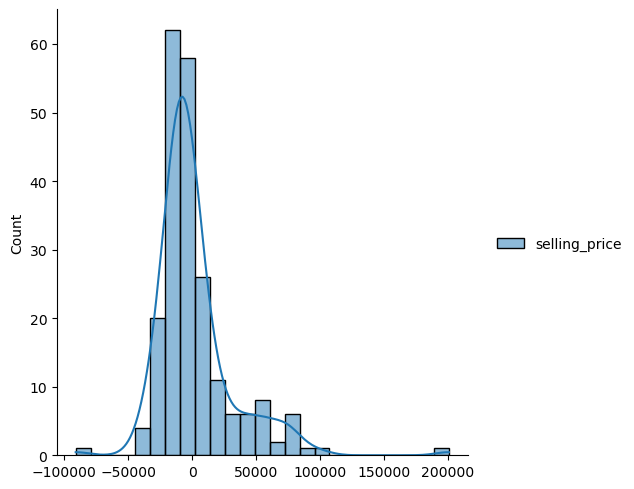

In [22]:
#The residual errors should be random and close to a normal distribution.
sns.displot(test_residual, bins=25, kde=True)